# Limpieza de datos

En este notebook se realizarán pruebas para determinar la limpieza necesaria de los datos.

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [9]:
UNIT = 'u049'

In [10]:
# Cargar el archivo CSV de la unidad

df = pd.read_csv(
    f'./joined_data/{UNIT}_joined.csv',
    header=0,
    dtype={
        'Latitud': 'float32',
        'Longitud': 'float32',
        'Velocidad (km/h)': 'float16',
        'Placa': 'str'
    }
)

df.head()

,Fecha,Hora,Placa,Alias,Motivo,Velocidad (km/h),Fecha de registro,Hora de registro,Georeferencia,Latitud,Longitud,Altitud (m),archivo_origen
0,2024-04-01 04:00:29,2024-04-01 04:00:29,49,NaN,Por tiempo de lectura,0.0,2024-04-01 04:00:33,2024-04-01 04:00:33,"A 264 m. de comedor rey saul (villa nueva, gua...",14.561165,-90.562035,1399,reporte_simulacion_049_20250429170919.xlsx
1,2024-04-01 04:05:29,2024-04-01 04:05:29,49,NaN,Por tiempo de lectura,0.0,2024-04-01 04:05:34,2024-04-01 04:05:34,"A 264 m. de comedor rey saul (villa nueva, gua...",14.561165,-90.562035,1399,reporte_simulacion_049_20250429170919.xlsx
2,2024-04-01 04:07:46,2024-04-01 04:07:46,49,NaN,Por tiempo de lectura,0.0,2024-04-01 04:07:51,2024-04-01 04:07:51,"A 264 m. de comedor rey saul (villa nueva, gua...",14.561165,-90.562035,1399,reporte_simulacion_049_20250429170919.xlsx
3,2024-04-01 04:07:50,2024-04-01 04:07:50,49,NaN,Encendido del vehiculo,0.0,2024-04-01 04:07:51,2024-04-01 04:07:51,"A 272 m. de comedor rey saul (villa nueva, gua...",14.561085,-90.561996,1399,reporte_simulacion_049_20250429170919.xlsx
4,2024-04-01 04:08:50,2024-04-01 04:08:50,49,NaN,Por tiempo de lectura,0.0,2024-04-01 04:08:55,2024-04-01 04:08:55,"A 272 m. de comedor rey saul (villa nueva, gua...",14.561085,-90.561996,1399,reporte_simulacion_049_20250429170919.xlsx


In [4]:
df.dtypes

Fecha                 object
Hora                  object
Placa                 object
Alias                float64
Motivo                object
Velocidad (km/h)     float16
Fecha de registro     object
Hora de registro      object
Georeferencia         object
Latitud              float32
Longitud             float32
Altitud (m)            int64
archivo_origen        object
dtype: object

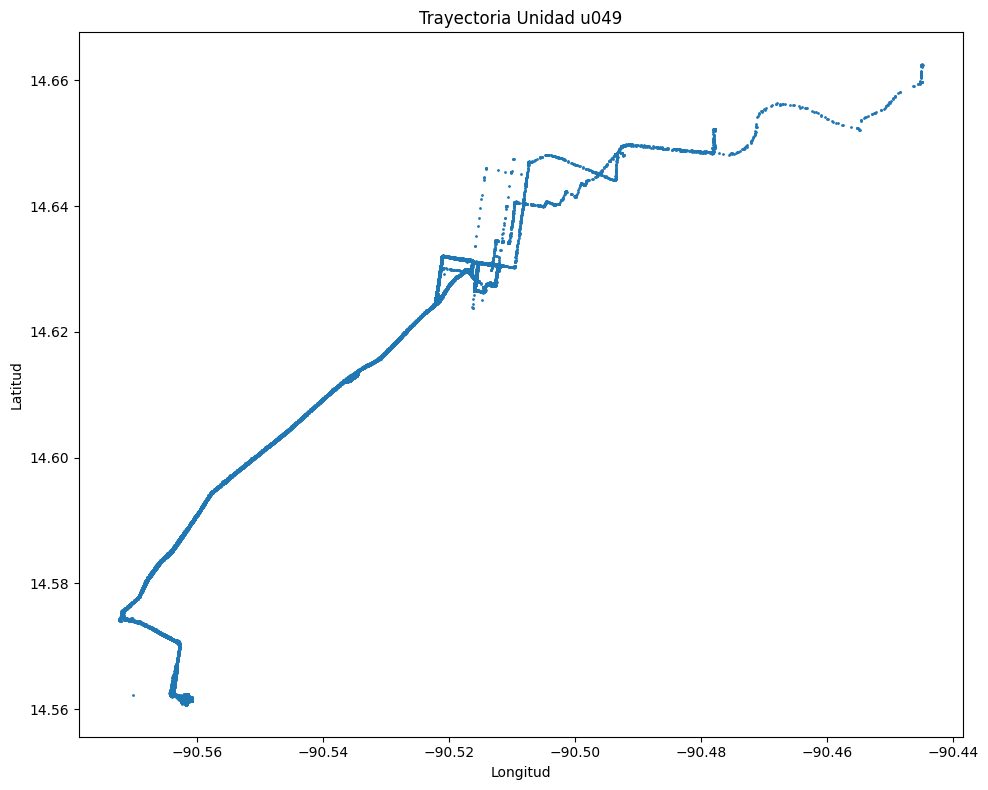

In [5]:
# Scatter de la ruta de la unidad
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitud'], df['Latitud'], s=1)
plt.title('Trayectoria Unidad ' + UNIT)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()

In [11]:
# Cantidad de valores nulos por columna
null_counts = df.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(null_counts)

Cantidad de valores nulos por columna:
Fecha                     0
Hora                      0
Placa                     0
Alias                226541
Motivo                   69
Velocidad (km/h)          0
Fecha de registro         0
Hora de registro          0
Georeferencia             0
Latitud                   0
Longitud                  0
Altitud (m)               0
archivo_origen            0
dtype: int64


In [7]:
# Eliminar columnas innecesarias
df.drop(columns=['Hora', 'Alias', 'Fecha de registro', 'Hora de registro', 'Georeferencia'], inplace=True)

# Eliminar duplicados exactos
df.drop_duplicates(subset=['Fecha','Latitud','Longitud'], inplace=True)

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [8]:
df

,Fecha,Placa,Motivo,Velocidad (km/h),Latitud,Longitud,Altitud (m),archivo_origen
0,2024-04-01 04:00:29,49,Por tiempo de lectura,0.0,14.561165,-90.562035,1399,reporte_simulacion_049_20250429170919.xlsx
1,2024-04-01 04:05:29,49,Por tiempo de lectura,0.0,14.561165,-90.562035,1399,reporte_simulacion_049_20250429170919.xlsx
2,2024-04-01 04:07:46,49,Por tiempo de lectura,0.0,14.561165,-90.562035,1399,reporte_simulacion_049_20250429170919.xlsx
3,2024-04-01 04:07:50,49,Encendido del vehiculo,0.0,14.561085,-90.561996,1399,reporte_simulacion_049_20250429170919.xlsx
4,2024-04-01 04:08:50,49,Por tiempo de lectura,0.0,14.561085,-90.561996,1399,reporte_simulacion_049_20250429170919.xlsx
...,...,...,...,...,...,...,...,...
226536,2024-03-31 22:35:29,49,Por tiempo de lectura,0.0,14.561165,-90.562035,1416,reporte_simulacion_049_20250516153054.xlsx
226537,2024-03-31 22:40:29,49,Por tiempo de lectura,0.0,14.561165,-90.562035,1416,reporte_simulacion_049_20250516153054.xlsx
226538,2024-03-31 22:45:29,49,Por tiempo de lectura,0.0,14.561165,-90.562035,1416,reporte_simulacion_049_20250516153054.xlsx
226539,2024-03-31 22:50:29,49,Por tiempo de lectura,0.0,14.561165,-90.562035,1416,reporte_simulacion_049_20250516153054.xlsx


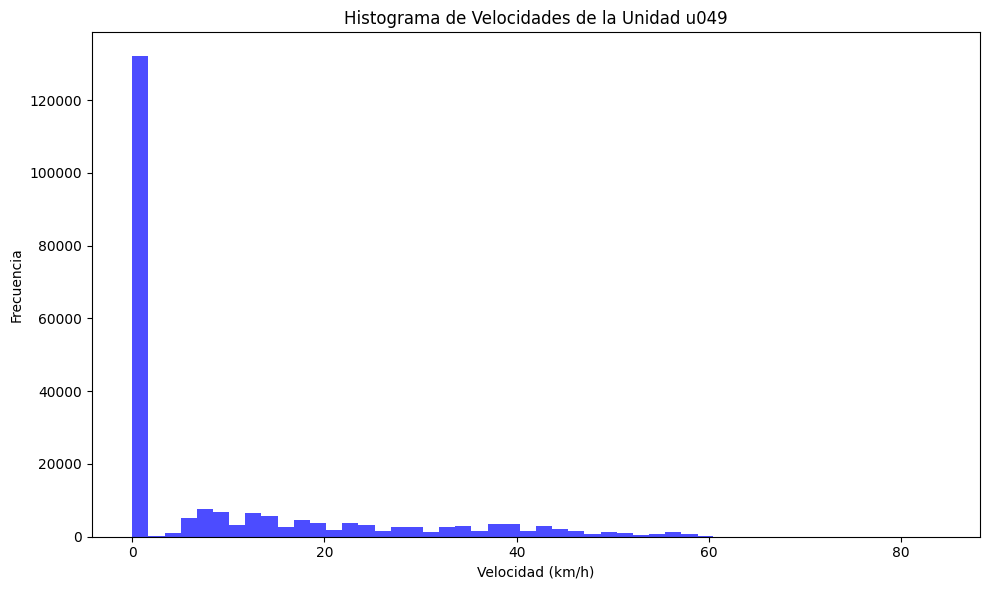

In [9]:
# Histograma de velocidades
plt.figure(figsize=(10, 6))
plt.hist(df['Velocidad (km/h)'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Velocidades de la Unidad ' + UNIT)
plt.xlabel('Velocidad (km/h)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Se encuentra un pico de frecuencia en 0 km/h. Estos registros podrían tratarse de paradas útiles, como la llegada a una estación, semáforo o congestionamiento; pero también podrían tratarse de registros inservibles.

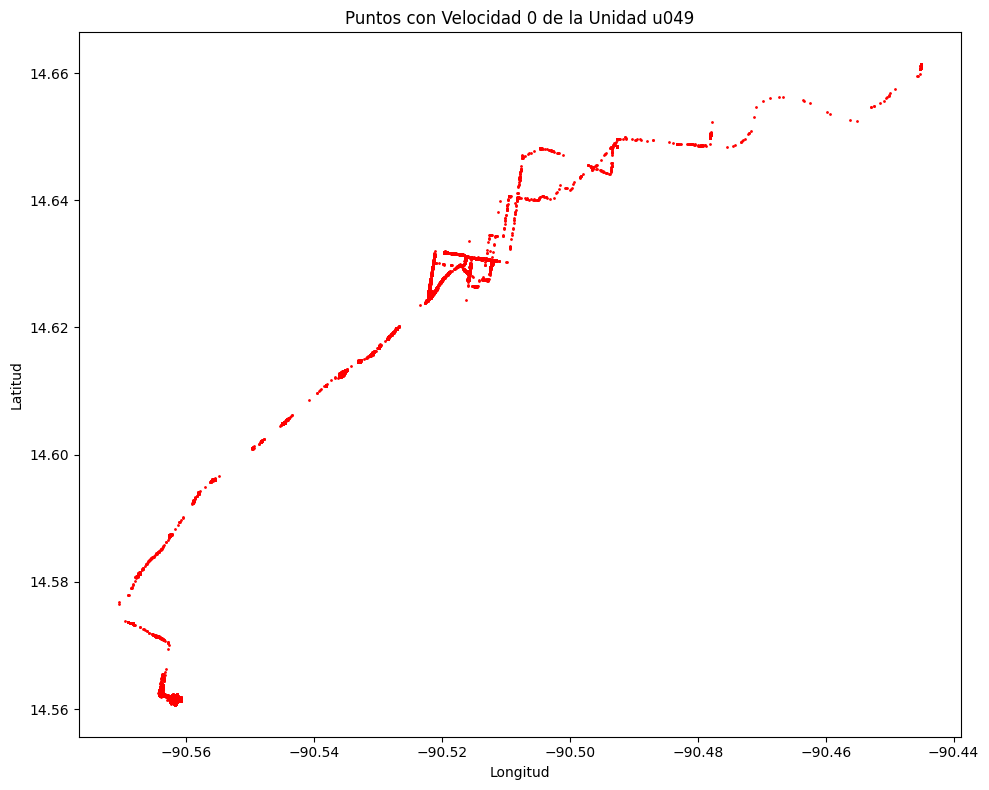

In [10]:
# Scatter de puntos en los que la velocidad es igual a 0
plt.figure(figsize=(10, 8))
plt.scatter(df[df['Velocidad (km/h)'] == 0]['Longitud'], df[df['Velocidad (km/h)'] == 0]['Latitud'], s=1, color='red')
plt.title('Puntos con Velocidad 0 de la Unidad ' + UNIT)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()

Puede notarse que los registros que presentan una velocidad de 0km/h cuentan con posiciones distribuidas a lo largo de toda la ruta, no se concentran únicamente en puntos específicos, por lo que será necesario filtrar más a profundidad estos registros para distinguir cuáles pertenecen a recorridos reales.

            total_puntos  puntos_parado  porcentaje_parado
Dia                                                       
2024-01-11           100             88          88.000000
2024-01-12           491            289          58.859470
2024-01-13           288            288         100.000000
2024-01-14           288            288         100.000000
2024-01-15           288            288         100.000000
...                  ...            ...                ...
2025-03-24           132            122          92.424242
2025-03-25            13             13         100.000000
2025-03-27             1              1         100.000000
2025-04-10           210            194          92.380952
2025-04-11           132            132         100.000000

[354 rows x 3 columns]


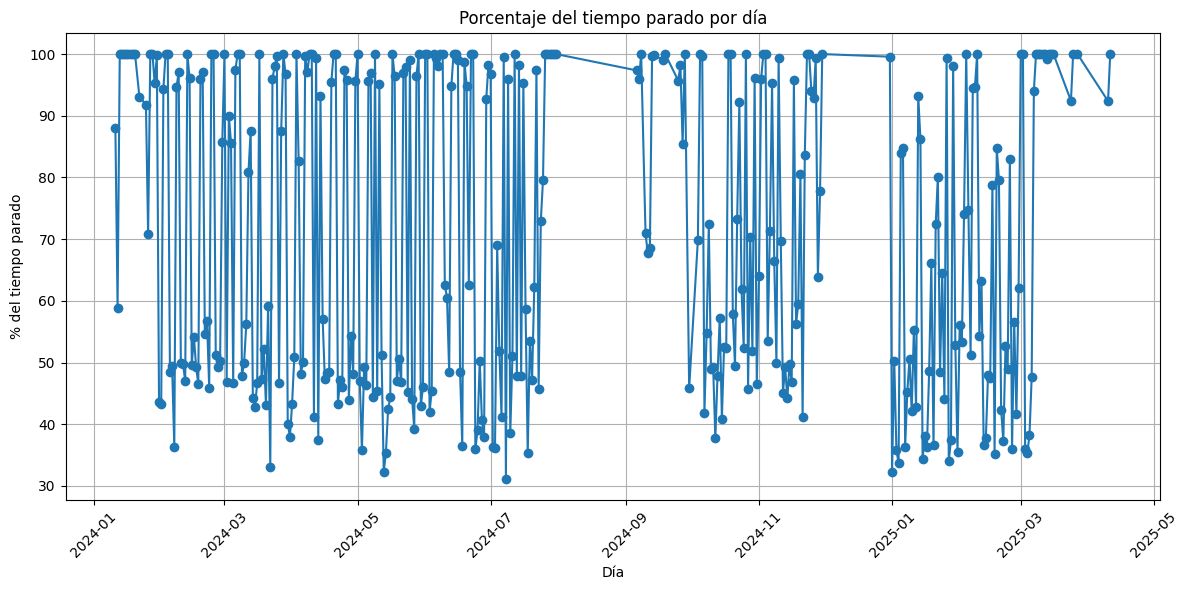

In [8]:
# Calcular el porcentaje de registros con velocidad 0 por día

# Crear columna para día
df['Dia'] = df['Fecha'].dt.date

# Marcar si está parado
df['Parado'] = df['Velocidad (km/h)'] == 0

# Agrupar por día
agg = df.groupby('Dia').agg(
    total_puntos=('Parado', 'count'),
    puntos_parado=('Parado', 'sum')
)

# Calcular porcentaje parado
agg['porcentaje_parado'] = (agg['puntos_parado'] / agg['total_puntos']) * 100

# Mostrar tabla
print(agg)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(agg.index, agg['porcentaje_parado'], marker='o')
plt.title('Porcentaje del tiempo parado por día')
plt.ylabel('% del tiempo parado')
plt.xlabel('Día')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Varios días muestran un porcentaje alto del tiempo sin movimiento, lo cual podría indicar que no hizo ninguna trayectoria útil. Sin embargo, esto no es suficiente por sí solo para distinguir definitivamente trayectos útiles de trayectos "basura", ya que pudo haber días en los que hubo un solo trayecto válido. Por tanto, se procede a identificar rutas en las que pasó por varias estaciones.

In [9]:
# Cargar el archivo Excel de estaciones
stations_df = pd.read_excel('./data/Estaciones.xlsx')

# Dividir "posición" en latitud y longitud
coords = stations_df['POSICIÓN'].str.split(',', expand=True)
stations_df['Latitud']  = coords[0].astype(float)
stations_df['Longitud'] = coords[1].astype(float)

In [10]:
import numpy as np
from sklearn.neighbors import BallTree
import pandas as pd

# ————————————————
# 1) Prepara estaciones
# ————————————————
stations_df['lat_rad'] = np.deg2rad(stations_df['Latitud'])
stations_df['lon_rad'] = np.deg2rad(stations_df['Longitud'])
station_coords = np.vstack([stations_df['lat_rad'], stations_df['lon_rad']]).T

# Construir el BallTree con métrica haversine
tree = BallTree(station_coords, metric='haversine')

# ————————————————
# 2) Prepara puntos GPS
# ————————————————
df['lat_rad'] = np.deg2rad(df['Latitud'])
df['lon_rad'] = np.deg2rad(df['Longitud'])
gps_coords = np.vstack([df['lat_rad'], df['lon_rad']]).T

# ————————————————
# 3) Busca la estación más cercana
# ————————————————
# k=1 → un vecino más cercano
dist_rad, idx = tree.query(gps_coords, k=1)

# Convierte distancia de radianes a metros (radio tierra ≈ 6 371 000 m)
df['dist_estacion_m'] = dist_rad[:, 0] * 6_371_000
df['estacion_idx']    = idx[:, 0]
df['estacion_cercana'] = stations_df['ESTACION'].iloc[df['estacion_idx']].values

# Opcional: filtra solo asignaciones confiables (≤ 100 m)
threshold_m = 100
df.loc[df['dist_estacion_m'] > threshold_m, 'estacion_cercana'] = None

# ————————————————
# 4) Cuenta estaciones únicas por día
# ————————————————
df['Dia'] = df['Fecha'].dt.date

agg_est = (
    df
    .groupby('Dia')['estacion_cercana']
    .nunique()                       # cuántos valores distintos (None cuenta como 1, cuidado)
    .reset_index(name='num_estaciones')
)

# Si prefieres excluir los None antes de contar:
# agg_est = (
#     df[df['estacion_cercana'].notna()]
#     .groupby('Dia')['estacion_cercana']
#     .nunique()
#     .reset_index(name='num_estaciones')
# )

agg_est
agg_est.to_csv(f'./joined_data/{UNIT}_estaciones_por_dia.csv', index=False)


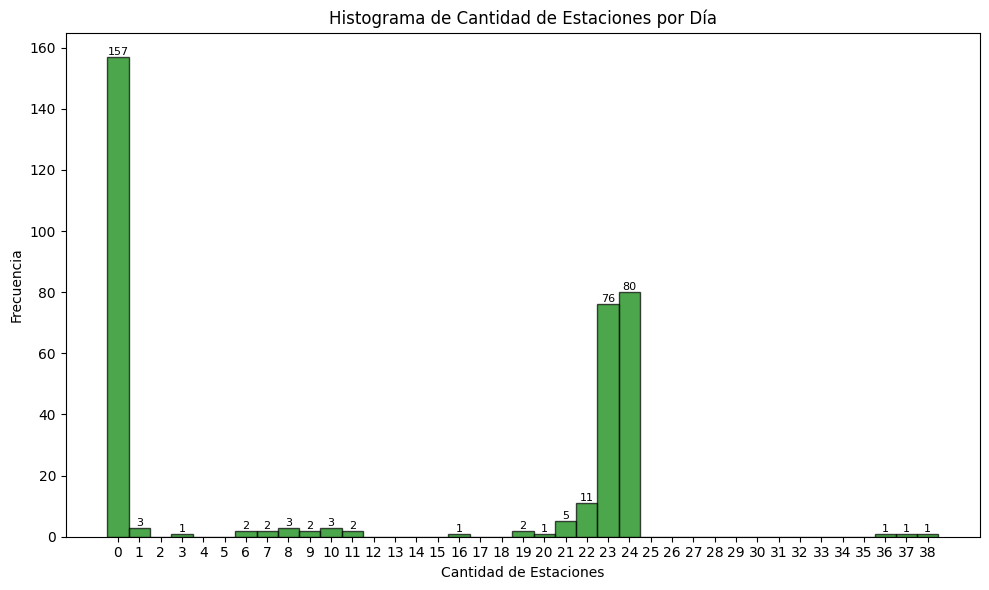

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Rangos de estaciones que aparecen
min_est = int(agg_est['num_estaciones'].min())
max_est = int(agg_est['num_estaciones'].max())

# Bins centrados en enteros: [min-0.5, min+0.5), [min+0.5, min+1.5), …, [max+0.5]
bins = np.arange(min_est - 0.5, max_est + 1.5, 1)

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(
    agg_est['num_estaciones'],
    bins=bins,
    color='green',
    alpha=0.7,
    edgecolor='black'
)

plt.title('Histograma de Cantidad de Estaciones por Día')
plt.xlabel('Cantidad de Estaciones')
plt.ylabel('Frecuencia')

# Ajustar ticks en cada entero
plt.xticks(np.arange(min_est, max_est + 1, 1))

# Etiquetar cada barra con su altura
for count, left_edge in zip(counts, bins[:-1]):
    if count > 0:
        center = left_edge + 0.5
        plt.text(
            center,    # x = centro del bin
            count,     # y = altura
            str(int(count)),
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()


In [12]:
# Imprimir los días que no pasan por ninguna estación
no_station = agg_est[agg_est['num_estaciones'] == 0]
no_station

,Dia,num_estaciones
0,2024-01-11,0
2,2024-01-13,0
3,2024-01-14,0
4,2024-01-15,0
5,2024-01-16,0
...,...,...
349,2025-03-24,0
350,2025-03-25,0
351,2025-03-27,0
352,2025-04-10,0


Cantidad de puntos sin visita a estación: 51297


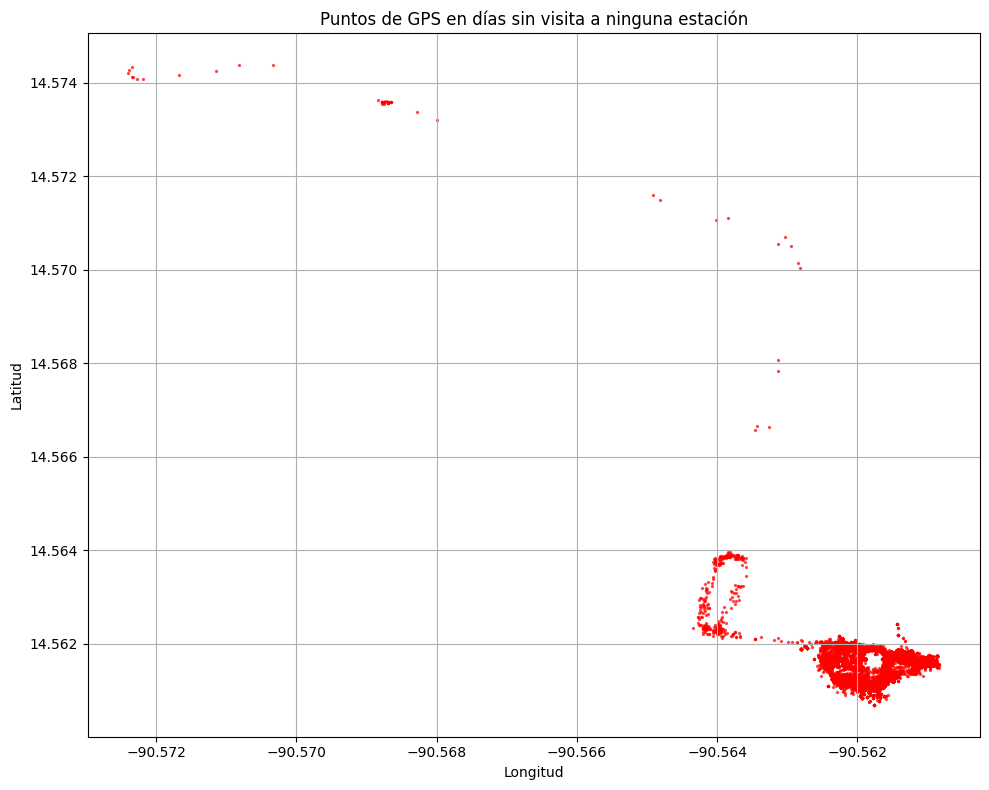

In [13]:
# 1) Días que no visitaron ninguna estación
dias_sin_est = agg_est.loc[agg_est['num_estaciones'] == 0, 'Dia']

# 2) Filtrar los puntos de esos días
df_sin_est = df[df['Fecha'].dt.date.isin(dias_sin_est)]

print(f'Cantidad de puntos sin visita a estación: {len(df_sin_est)}')

# 3) Scatter de esos puntos
plt.figure(figsize=(10, 8))
plt.scatter(
    df_sin_est['Longitud'],
    df_sin_est['Latitud'],
    s=2,
    alpha=0.6,
    color='red'
)
plt.title('Puntos de GPS en días sin visita a ninguna estación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import folium
from folium.plugins import FastMarkerCluster
import random

# Prepara las coordenadas, muestreando si son muchas
coords = df_sin_est[['Latitud', 'Longitud']].dropna().values.tolist()

# Crea el mapa centrado en el promedio de coordenadas
lat_mean = df_sin_est['Latitud'].mean()
lon_mean = df_sin_est['Longitud'].mean()
m = folium.Map(location=[lat_mean, lon_mean], zoom_start=14)

# Agrega los puntos como un cluster para rendimiento
FastMarkerCluster(data=coords).add_to(m)

# Guardar el mapa
m.save('mapa.html')


In [15]:
# Crea el mapa
lat_mean = df_sin_est['Latitud'].mean()
lon_mean = df_sin_est['Longitud'].mean()
m = folium.Map(location=[lat_mean, lon_mean], zoom_start=14)

# Añade un CircleMarker estático por cada punto
for lat, lon in coords:
    folium.CircleMarker(
        location=[lat, lon],
        radius=1,            # tamaño del punto
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save('mapa.html')

El mapa muestra una nube densa de puntos, delimitando claramente una cochera para las unidades de Transmetro; en este caso, localizada en el Cenma, zona 12 de la Ciudad capital. Estos puntos indican que la unidad está prácticamente estacionario o dando vueltas en un área cerrada. Los pequeños grupos de puntos al norte y noreste son recorridos muy cortos o pruebas, que no llegan a ninguna estación de servicio.

Por tanto, ninguno de estos puntos representa un trayecto “entre estaciones”, así que descartarlos mejorará la calidad del dataset.

Ahora que ya se identificaron los días en los que la unidad no hizo ninguna trayectoria útil para la predicción del tiempo estimado de llegada, se procede a analizar los días en los que la unidad sí pasó por al menos dos estaciones, indicando que efectivamente estaba realizando una ruta de servicio.

In [16]:
# Entonces, ahora se puede filtrar el DataFrame original para eliminar esos días sin estaciones
# Esto es útil para limpiar el dataset y enfocarse en los días con actividad relevante.
df_filtrado = df[~df['Fecha'].dt.date.isin(dias_sin_est)]

### Segmentación de días útiles en bloques

In [34]:
prueba = df_filtrado[df_filtrado['trip_id'] == 7]

prueba.to_csv('prueba.csv', index=False)

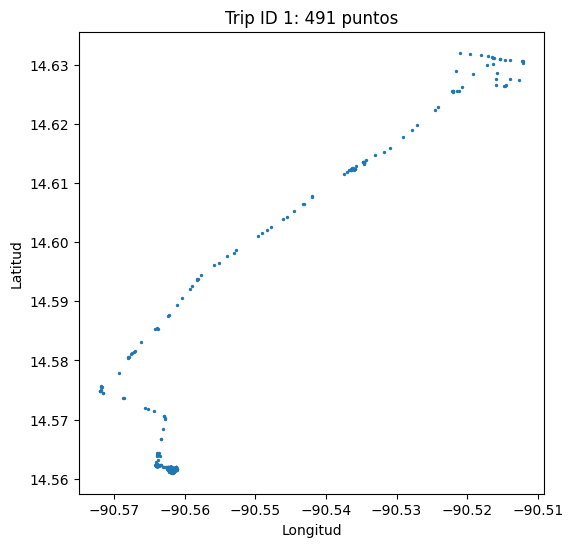

In [37]:
import random
muestra = random.sample(list(viajes_reales[viajes_reales['start_time'] == '2024-02-06 00:02:34'].index), 1)   # 1 viaje cualquiera

import matplotlib.pyplot as plt


sub = df_filtrado[(df_filtrado['trip_id'] == 1)]
plt.figure(figsize=(6,6))
plt.scatter(sub['Longitud'], sub['Latitud'], s=2)
plt.title(f'Trip ID 1: {len(sub)} puntos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [48]:
# -----------------------------
# Configuración
# -----------------------------
COL_FECHA = 'Fecha'
COL_TRIP  = 'trip_id'
COL_EST   = 'estacion_cercana'
COL_VEL   = 'Velocidad (km/h)'      # opcional (solo si usarás recorte por velocidad)
USAR_RECORTE_VELOCIDAD = False       # pon en False si no quieres esta parte
V0_KMH = 1.0                         # umbral para considerar "parado"
MAX_IDLE_S = 300                     # ventana máxima (seg) de inactividad a recortar (5 min)
PRE_MIN_BEFORE_FIRST_STATION = 8   # 5–15 min suele ir bien
POST_MIN_AFTER_LAST_STATION  = 2   # pequeño margen de salida

# -----------------------------
# Utilidades
# -----------------------------
def _recorte_por_estaciones(df_trip, col_est=COL_EST, col_fecha=COL_FECHA):
    """
    Recorta al rango [t0 : t1], donde t0 es 'first_station_time - PRE_MIN' y
    t1 es 'last_station_time + POST_MIN'. Si no hay estaciones, devuelve vacío.
    """
    df_trip = df_trip.sort_values(col_fecha).copy()
    no_nulos = df_trip[col_est].notna()
    if not no_nulos.any():
        return df_trip.iloc[0:0]  # vacío

    # índices de primera/última estación
    first_idx = df_trip.index[no_nulos][0]
    last_idx  = df_trip.index[no_nulos][-1]

    # ventanas temporales
    t_first = df_trip.loc[first_idx, col_fecha]
    t_last  = df_trip.loc[last_idx,  col_fecha]
    t0 = t_first - pd.Timedelta(minutes=PRE_MIN_BEFORE_FIRST_STATION)
    t1 = t_last  + pd.Timedelta(minutes=POST_MIN_AFTER_LAST_STATION)

    # filtro por tiempo
    rec = df_trip[(df_trip[col_fecha] >= t0) & (df_trip[col_fecha] <= t1)]

    # (opcional) si activas recorte por velocidad, esto limpiará colas paradas dentro del pre-roll
    return rec

def _recorte_colas_estacionado(df_trip, col_fecha=COL_FECHA, col_vel=COL_VEL,
                               v0_kmh=V0_KMH, max_idle_s=MAX_IDLE_S):
    """Recorta colas iniciales y finales con velocidad <= v0_kmh si el tramo estacionado es prolongado (>= max_idle_s)."""
    if col_vel not in df_trip.columns:
        return df_trip  # no hay velocidad; no recortamos por velocidad

    # Asegurar orden temporal y calcular dt (segundos) por fila
    trip = df_trip.sort_values(col_fecha).copy()
    dt = trip[col_fecha].diff().dt.total_seconds().fillna(0).to_numpy()

    vel = trip[col_vel].astype(float).to_numpy()
    idx = trip.index.to_numpy()

    # --- Recorte inicial ---
    # acumula tiempo estacionado desde el inicio hasta el primer movimiento
    idle_sum = 0.0
    start_cut_idx = idx[0]
    found_move = False
    for i in range(len(trip)):
        if vel[i] <= v0_kmh:
            # suma dt desde esta fila hacia la siguiente (dt[i+1] se acumulará en la iteración siguiente)
            idle_sum += dt[i]
        else:
            found_move = True
            if idle_sum >= max_idle_s:
                start_cut_idx = idx[i]  # cortar hasta el primer punto con movimiento
            break
    # si nunca hubo movimiento, no recortamos por velocidad (ya lo hizo el recorte por estaciones)

    # --- Recorte final ---
    idle_sum_tail = 0.0
    end_cut_idx = idx[-1]
    found_move_tail = False
    # recorremos al revés; dt_rev es el delta "hacia atrás", aproximamos con dt en sentido inverso
    dt_rev = np.r_[0, np.diff(trip[col_fecha].iloc[::-1]).astype('timedelta64[s]').astype(float)]
    vel_rev = vel[::-1]
    idx_rev = idx[::-1]
    for i in range(len(trip)):
        if vel_rev[i] <= v0_kmh:
            idle_sum_tail += dt_rev[i]
        else:
            found_move_tail = True
            if idle_sum_tail >= max_idle_s:
                end_cut_idx = idx_rev[i]  # cortar desde este punto hacia el final
            break

    # Aplicar los cortes calculados
    trip = trip.loc[start_cut_idx:end_cut_idx]
    return trip

def limpiar_trips_por_estaciones(df_filtrado: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Aplica recorte por estaciones y (opcional) por velocidad a cada trip_id.

    Returns:
        df_limpio: puntos resultantes tras recortes
        resumen_trips: métricas por trip antes/después
        drops_por_trip: conteo de puntos eliminados por trip
    """
    assert {COL_FECHA, COL_TRIP, COL_EST}.issubset(df_filtrado.columns), \
        "df_filtrado debe contener columnas 'Fecha', 'trip_id' y 'estacion_cercana'."

    df = df_filtrado.copy()
    df[COL_FECHA] = pd.to_datetime(df[COL_FECHA], errors='coerce')
    df = df.sort_values([COL_TRIP, COL_FECHA])

    # métricas previas por trip
    prev = (
        df.groupby(COL_TRIP)
          .agg(
              start=('Fecha','first'),
              end=('Fecha','last'),
              puntos=('Fecha','count'),
              est_uniq=(COL_EST, lambda s: s.dropna().nunique()),
              dur_s=('Fecha', lambda s: (s.max()-s.min()).total_seconds())
          ).reset_index()
    )
    
    # Eliminar trips con pocas estaciones o de duración corta
    valid_ids = prev[(prev['dur_s'] >= 300) & (prev['est_uniq'] >= 2)]
    valid_ids = set(valid_ids[COL_TRIP])

    recortes = []
    for trip_id, g in df.groupby(COL_TRIP, sort=False):

        # Omitir viajes no válidos
        if trip_id not in valid_ids:
            continue
        
        # 1) recorte por estaciones
        g1 = _recorte_por_estaciones(g)

        # si quedó vacío, seguimos (no aportará puntos)
        if g1.empty:
            continue

        # 2) recorte por colas estacionadas (opcional)
        if USAR_RECORTE_VELOCIDAD:
            g2 = _recorte_colas_estacionado(g1)
        else:
            g2 = g1

        recortes.append(g2)

    df_limpio = pd.concat(recortes, ignore_index=False) if recortes else df.iloc[0:0]
    df_limpio = df_limpio.sort_values([COL_TRIP, COL_FECHA]).copy()

    # métricas posteriores por trip
    post = (
        df_limpio.groupby(COL_TRIP)
                 .agg(
                     start=('Fecha','first'),
                     end=('Fecha','last'),
                     puntos=('Fecha','count'),
                     est_uniq=(COL_EST, lambda s: s.dropna().nunique()),
                     dur_s=('Fecha', lambda s: (s.max()-s.min()).total_seconds())
                 ).reset_index()
    )

    # drops por trip
    drops = prev[[COL_TRIP,'puntos']].merge(
        post[[COL_TRIP,'puntos']].rename(columns={'puntos':'puntos_post'}),
        on=COL_TRIP, how='left'
    )
    drops['puntos_post'] = drops['puntos_post'].fillna(0).astype(int)
    drops['puntos_eliminados'] = drops['puntos'] - drops['puntos_post']

    return df_limpio, post, drops

# =============================
#  EJECUCIÓN SOBRE df_filtrado
# =============================
df_limpio, resumen_trips, drops_por_trip = limpiar_trips_por_estaciones(df_filtrado)

# Guardar

df_limpio.to_csv('./clean_data/u049_trips_limpios.csv', index=False)
resumen_trips.to_csv('./clean_data/u049_resumen_trips_post.csv', index=False)
drops_por_trip.to_csv('./clean_data/u049_drops_por_trip.csv', index=False)


In [47]:
import os
import folium
from folium.plugins import MarkerCluster

OUT_DIR = "./maps_u049"
os.makedirs(OUT_DIR, exist_ok=True)

def make_trip_map(df_trip, trip_id, out_dir=OUT_DIR):
    if df_trip.empty:
        return None

    # Centro y mapa
    lat_center = df_trip['Latitud'].mean()
    lon_center = df_trip['Longitud'].mean()
    m = folium.Map(location=[lat_center, lon_center], zoom_start=13, control_scale=True)

    # Polilínea del recorrido (orden temporal)
    df_trip = df_trip.sort_values('Fecha')
    coords = df_trip[['Latitud','Longitud']].values.tolist()
    folium.PolyLine(coords, weight=4, opacity=0.8).add_to(m)

    # Marcadores inicio/fin
    start = df_trip.iloc[0]
    end   = df_trip.iloc[-1]
    folium.Marker(
        [start['Latitud'], start['Longitud']],
        popup=f"Inicio: {start['Fecha']}",
        tooltip="Inicio"
    ).add_to(m)
    folium.Marker(
        [end['Latitud'], end['Longitud']],
        popup=f"Fin: {end['Fecha']}",
        tooltip="Fin",
        icon=folium.Icon(icon="flag")
    ).add_to(m)

    # Puntos con estación asignada (si existe la columna)
    if 'estacion_cercana' in df_trip.columns:
        est_mask = df_trip['estacion_cercana'].notna()
        if est_mask.any():
            cluster = MarkerCluster(name="Puntos con estación").add_to(m)
            for _, r in df_trip[est_mask].iterrows():
                folium.CircleMarker(
                    [float(r['Latitud']), float(r['Longitud'])],
                    radius=3,
                    fill=True,
                    popup=f"{r['Fecha']} - {r['estacion_cercana']}"
                ).add_to(cluster)

    out_path = os.path.join(out_dir, f"trip_{trip_id}.html")
    m.save(out_path)
    return out_path

# --- Generar todos los mapas por trip_id ---
trip_maps = []
for tid, g in df_limpio.groupby('trip_id', sort=True):
    p = make_trip_map(g, tid)
    if p:
        trip_maps.append((tid, p))

# --- Index con enlaces a cada mapa ---
index_path = os.path.join(OUT_DIR, "index.html")
with open(index_path, "w", encoding="utf-8") as f:
    f.write("<h2>Mapas por viaje (u049)</h2><ul>")
    for tid, path in trip_maps:
        fname = os.path.basename(path)
        f.write(f'<li><a href="{fname}" target="_blank">Trip {tid}</a></li>')
    f.write("</ul>")

print(f"Listo. Revisa la carpeta {OUT_DIR} y abre index.html")


Listo. Revisa la carpeta ./maps_u049 y abre index.html
